In [17]:
import torch
import torch.nn as nn
from PIL import Image
import numpy 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [19]:
class Encoder(nn.Module):
  def __init__(self,latent_dim):
    super().__init__()

    self.conv1 = nn.Conv2d(
        in_channels=3,
        out_channels=32,
        kernel_size=4,
        stride=1,
    )
    self.conv2 = nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=4,
        stride=1,
    )
    self.relu = nn.ReLU()
    self.fc_mu = nn.Linear(215296,latent_dim)
    self.fc_logvar = nn.Linear(215296,latent_dim)
  def forward(self,x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    #x = self.conv3(x)
    #x = self.relu(x)
    x = x.view(x.size(0),-1)
    mu = self.fc_mu(x)
    logvar = self.fc_logvar(x)
    return mu,logvar

In [20]:
class Decoder(nn.Module):
  def __init__(self,latent_dim):
    super().__init__()
    self.fc = nn.Linear(latent_dim,64*58*58)
    self.deconv1 = nn.ConvTranspose2d(
        in_channels=64,
        out_channels=32,
        kernel_size=4,
        stride=1
    )
    self.deconv2 = nn.ConvTranspose2d(
        in_channels=32,
        out_channels=3,
        kernel_size=4,
        stride=1
    )
    self.relu = nn.ReLU()
  def forward(self,z):
    x = self.fc(z)
    x = x.view(x.size(0),64,58,58)
    x = self.relu(x)
    x = self.deconv1(x)
    x = self.relu(x)
    x = torch.sigmoid(self.deconv2(x))
    return x


In [21]:
class VAE(nn.Module):
  def __init__(self,latent_dim):
    super().__init__()
    self.encoder = Encoder(latent_dim).to(device)
    self.decoder = Decoder(latent_dim).to(device)

  def reparameterize(self,mu,logvar):
    eps = torch.randn_like(logvar)
    z = mu + eps * torch.exp(0.5 * logvar)
    return z
  def forward(self,x):
    mu,logvar = self.encoder(x)
    z = self.reparameterize(mu,logvar)
    x_hat = self.decoder(z)
    return x_hat,mu,logvar

In [22]:
model = VAE(200)

In [23]:
model.state_dict()

OrderedDict([('encoder.conv1.weight',
              tensor([[[[-0.0866,  0.0951, -0.0199, -0.1191],
                        [ 0.0677, -0.1309, -0.0232,  0.0361],
                        [ 0.1053,  0.0840,  0.0294, -0.0069],
                        [-0.0649,  0.1231, -0.0031, -0.1347]],
              
                       [[ 0.0099,  0.0613,  0.0239,  0.0594],
                        [ 0.0360, -0.1312,  0.1078, -0.0576],
                        [ 0.1068, -0.1157, -0.1030, -0.0893],
                        [-0.0295,  0.1158,  0.0479, -0.0774]],
              
                       [[ 0.1275, -0.0827, -0.0870, -0.0484],
                        [ 0.1163,  0.0007, -0.1442,  0.1001],
                        [ 0.0349, -0.0489,  0.0324, -0.0178],
                        [ 0.0773, -0.1339, -0.0142,  0.0212]]],
              
              
                      [[[ 0.0318, -0.0158, -0.1104, -0.0002],
                        [-0.0944,  0.1143, -0.0789, -0.0131],
                        [ 0.08

In [44]:
model = torch.load('prototype_2.pth',map_location=torch.device('cpu'))

In [37]:
model.encoder = torch.load('prototype_encoder1.pth',map_location=torch.device('cpu'))

In [38]:
model.decoder = torch.load('prototype_decoder1.pth',map_location=torch.device('cpu'))

In [39]:
model.state_dict()

OrderedDict([('encoder.conv1.weight',
              tensor([[[[ 0.0289, -0.0034, -0.0226,  0.0672],
                        [-0.0562, -0.0123,  0.0230, -0.1365],
                        [ 0.0106,  0.0892, -0.1146,  0.0331],
                        [ 0.1466,  0.0907, -0.0181, -0.0226]],
              
                       [[-0.1123,  0.0508, -0.0321, -0.0899],
                        [-0.0394,  0.1206,  0.0259, -0.1099],
                        [ 0.1424,  0.1485,  0.0851, -0.1212],
                        [ 0.0426, -0.0909,  0.1537, -0.0432]],
              
                       [[-0.1185,  0.0766, -0.0953, -0.0961],
                        [ 0.1257,  0.0315, -0.0914, -0.0715],
                        [-0.0796,  0.0887, -0.0213,  0.0950],
                        [-0.0312, -0.0044,  0.0382, -0.0509]]],
              
              
                      [[[-0.1165, -0.0850, -0.0498, -0.0856],
                        [-0.0039,  0.0572,  0.0556, -0.1289],
                        [ 0.00

In [40]:
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [41]:
img = Image.open('pexels-mer-ouane-12111334.jpg')
img = test_transforms(img)
img

tensor([[[0.1137, 0.0706, 0.0667,  ..., 0.0902, 0.0941, 0.1686],
         [0.0824, 0.0745, 0.0667,  ..., 0.0667, 0.0980, 0.2157],
         [0.0902, 0.0667, 0.0745,  ..., 0.0863, 0.1176, 0.2941],
         ...,
         [0.6039, 0.7294, 0.4706,  ..., 0.0510, 0.0471, 0.0510],
         [0.6863, 0.7922, 0.5216,  ..., 0.0667, 0.0549, 0.0549],
         [0.6627, 0.6824, 0.5529,  ..., 0.0863, 0.0588, 0.0549]],

        [[0.1725, 0.1294, 0.1176,  ..., 0.1490, 0.1647, 0.2510],
         [0.1216, 0.1216, 0.1137,  ..., 0.1137, 0.1608, 0.3216],
         [0.1333, 0.1020, 0.1137,  ..., 0.1412, 0.1804, 0.4039],
         ...,
         [0.6392, 0.7725, 0.5137,  ..., 0.0863, 0.0706, 0.0627],
         [0.7137, 0.8196, 0.5608,  ..., 0.1020, 0.0627, 0.0588],
         [0.7059, 0.7412, 0.6078,  ..., 0.1176, 0.0667, 0.0627]],

        [[0.1804, 0.1333, 0.1137,  ..., 0.1373, 0.1529, 0.2902],
         [0.1255, 0.1216, 0.1059,  ..., 0.0863, 0.1490, 0.3765],
         [0.1451, 0.1098, 0.1059,  ..., 0.1137, 0.1529, 0.

In [42]:
model.eval()
with torch.no_grad():
  result,a,b = model(img.unsqueeze(dim=0).to(device))

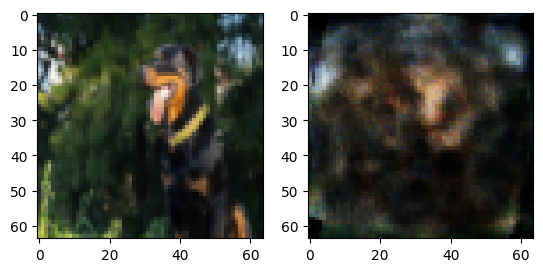

In [43]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(img.squeeze().permute(1,2,0))
ax[1].imshow(result.squeeze().permute(1,2,0).cpu())